# 1. Logistic regression

* Hàm mục tiêu của Logistic Regression: $\hat{y}=\sigma\left({X\theta}^T\right)$

* Hàm mất mát: $L\left(\theta\right)=-\frac{1}{m}\sum_{i=1}^{m}\left[y^{\left(i\right)}log\left({\hat{y}}^{\left(i\right)}\right)+\left(1-y^{\left(i\right)}\right)log\left(1-{\hat{y}}^{\left(i\right)}\right)\right]$

## Load dữ liệu

In [839]:
from sklearn.datasets import load_iris

iris = load_iris()

## Tạo dữ liệu huấn luyện

**Trong bài này, chúng ta sẽ dùng thuộc tính Petal Width để phân loại xem loài hoa đang xét có phải là Virginica hay không => phân lớp nhị phân với 2 nhãn: Virginica (1) và không phải Virginica (2).**

In [840]:
X =  iris['data'][:,3:]
y= (iris['target'] == 2).astype(int)

**Tạo dữ liệu dự đoán: sinh ra ngẫu nhiên 1000 phần tử tương ứng với Petal Width trong khoảng giá trị từ 0 - 3 cm.**

In [841]:
import numpy as np

In [842]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

# 2. Gradient descent

**Thuật toán Gradient descent:**

$\theta := \theta_{0}$	  // Khởi tạo trọng số
<br>

Repeat {
<br>
$\theta := \theta - \alpha*\frac{dL(\theta,b)}{d\theta}$
<br>
}


Vector gradient của $\theta: 	 \frac{dL(\theta)}{d\theta}=\frac{1}{m}X^T\left(\hat{y}-y\right)*$

## Bước 1: Thêm giá trị bias_term vào vector X ban đầu.

In [843]:
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

## Bước 2: Viết hàm tính sigmoid cho 1 vector.  $\hat{y}=\sigma\left({X\theta}^T\right)$. Đặt tên hàm là sigmoid.
* Gợi ý: Dùng thư viện np.exp() để tính giá trị e. 


In [844]:
def sigmoid(X,theta):
    z= np.dot(X,theta.T)
    sig = 1/(1+np.exp(-z))
    return sig

## Bước 3: Viết hàm tính giá trị hàm loss. Đặt tên hàm là compute_loss.

$$
    L\left(\theta\right)=-\frac{1}{m}\sum_{i=1}^{m}\left[y^{\left(i\right)}\log\left({\hat{y}}^{\left(i\right)}\right)+\left(1-y^{\left(i\right)}\right)\log\left(1-{\hat{y}}^{\left(i\right)}\right)\right]
$$

In [845]:
def compute_loss(y,y_hat):
    loss = -np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    return loss

## Bước 4: Viết hàm tính giá trị Gradient descent. Đặt tên hàm là compute_gradient.
* $\theta: 	 \frac{dL(\theta)}{d\theta}=\frac{1}{m}X^T\left(\hat{y}-y\right)$

In [846]:
def compute_gradient(X,y,y_hat):
    gradient = np.dot(X.T, (y_hat - y)) / y.shape[0]
    return gradient

## Bước 5: Viết hàm khởi tạo tham số cho w. Đặt tên là initializers.

In [847]:
def initializers(X):
    return np.zeros(X.shape[1])
    

## Bước 6: Dùng gradient descent để tìm ra tham số tối ưu. Đặt tên hàm là fit.

In [848]:
list_loss = []
def fit(X,y,iter=100,alpha=0.1):
    w = initializers(X)
    for _ in range(iter):
        y_hat = sigmoid(X,w)
        loss = compute_loss(y,y_hat)
        list_loss.append(loss)
        gradient = compute_gradient(X,y,y_hat)
        w = w - alpha*gradient
    return w

## Bước 7: Viết hàm dự đoán, đặt tên là predict. 

In [849]:
def predict(X,w):
    y_pred = [0 if y_hat <0.5 else 1 for y_hat in sigmoid(X,w)]
    return y_pred

# Bài 3

## Bài 1: Các bạn hiện thực lại mô hình Logistic Regression theo các hướng dẫn ở mục 2. Huấn luyện mô hình với siêu tham số alpha = 0.1 và iter = 100.

In [850]:
theta=fit(X,y,iter=100,alpha=0.1)

## Bài 2: Dùng tham số θ vừa huấn luyện được từ mô hình dự đoán cho 100 dòng dữ liệu đầu tiên từ tập dữ liệu gốc. So sánh kết quả dự đoán với nhãn thực sự của dữ liệu.

### Lấy 100 mẫu dữ lkệu đầu tiên để so sánh và dự đoán

In [851]:
X_100=X[:100]
y_100=y[:100]

### Dự đoán cho 100 dòng dữ liệu đầu tiên

In [852]:
y_pred_100 = predict(X_100,theta)

### So sánh kết quả dự đoán với nhãn thực sự của dữ liệu

In [853]:
from sklearn.metrics import accuracy_score

In [854]:
accuracy_score(y_100,y_pred_100)

0.98

## Bài 3: Trong Bước 5, với mỗi lần lặp để cập nhật trọng số, hãy tính giá trị hàm mất mát của mỗi lần lặp và đưa vào list loss. Vẽ biểu đồ giá trị loss sau mỗi lần lặp. 

### <div style="color:green;text-align:center">Đã cập nhật lại hàm fit ở trên để đưa hàm loss và list_loss vào</div>

### Vẽ biểu đồ giá trị loss sau mỗi lần lặp với dữ liệu training là X và y ban đầu

In [855]:
import matplotlib.pyplot as plt
import seaborn as sns

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


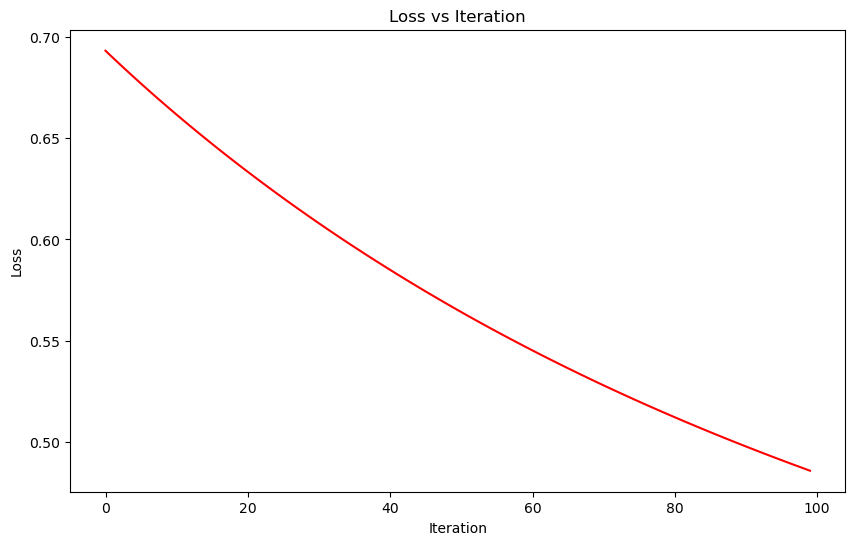

In [856]:
plt.figure(figsize=(10,6))
sns.lineplot(x=range(len(list_loss)),y=list_loss,color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iteration')
plt.show()

## Bài 4: Dùng tham số θ vừa huấn luyện được từ mô hình dự đoán cho dữ liệu X_new.

### Tạo bias term cho X_new

In [857]:
X_new_b = np.c_[np.ones((X_new.shape[0], 1)), X_new]

### Dự đoán cho dữ liệu X_new_b với tham số θ vừa huấn luyện được

In [858]:
y_pred_new= predict(X_new_b,theta)

## Bài 5: Các bạn hãy dùng thư viện Logistic Regression trong sklearn để dự đoán, và so sánh kết quả giữa dùng thư viện và làm bằng tay đối với Bài 2 và Bài 4

### Khởi tạo model với sklearn

In [859]:
from sklearn.linear_model import LogisticRegression
lgr= LogisticRegression()

In [860]:
lgr_model= lgr.fit(X,y)

### Thực hiện dự đoán kết quả  và so sánh với bài 2

**Dự đoán**

In [861]:
y_pred_100_sklearn = lgr_model.predict(X_100)

**So sánh với kết quả đã làm bằng tay**

In [862]:
print("Số dự đoán sai lệch :",np.sum(y_pred_100_sklearn!=y_pred_100))
print("Tỷ lệ sai lệch :",np.sum(y_pred_100_sklearn!=y_pred_100)/len(y_pred_100_sklearn))

Số dự đoán sai lệch : 0
Tỷ lệ sai lệch : 0.0


### Thực hiện dự đoán kết quả  và so sánh với bài 4

**Dự đoán**

In [863]:
y_pred_new_sklearn = lgr_model.predict(X_new_b)

**So sánh với kết quả đã làm bằng tay**

In [864]:
print("Số dự đoán sai lệch :",np.sum(y_pred_new_sklearn!=y_pred_new))
print("Tỷ lệ sai lệch :",np.sum(y_pred_new_sklearn!=y_pred_new)/len(y_pred_new))

Số dự đoán sai lệch : 13
Tỷ lệ sai lệch : 0.013


## Bài 6*: Hãy sử dụng các thuộc tính khác như Petal Length, Sepal Length và Sepal Width để huấn luyện cho mô hình, và cho biết kết quả. 

#### Dữ liệu huấn luyện cho bài toán phân lớp sẽ gồm 2 phần:
*	X: các thuộc tính của dữ liệu. Có tổng cộng 4 thuộc tính gồm Sepal Length, Sepal Width, Petal Length, Petal Width.
*	y: thuộc tính nhãn. Có 3 nhãn gồm Setosa, Versicolour, and Virginica
* **Tổng cộng có 150 điểm dữ liệu.**

### Lấy 2 thuộc tính Sepal Width và Petal Length ra dự đoán

In [865]:
X_sw_pl=iris['data'][:,1:3]

### Thêm bias-term

In [866]:
X_sw_pl=np.concatenate((np.ones((X_sw_pl.shape[0],1)),X_sw_pl),axis=1)

### Huấn luyện mô hình (làm tay)

In [867]:
list_loss=[]    #reset list_loss
theta_sw_pl=fit(X_sw_pl,y,iter=100,alpha=0.1)

### Đồ thị loss

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


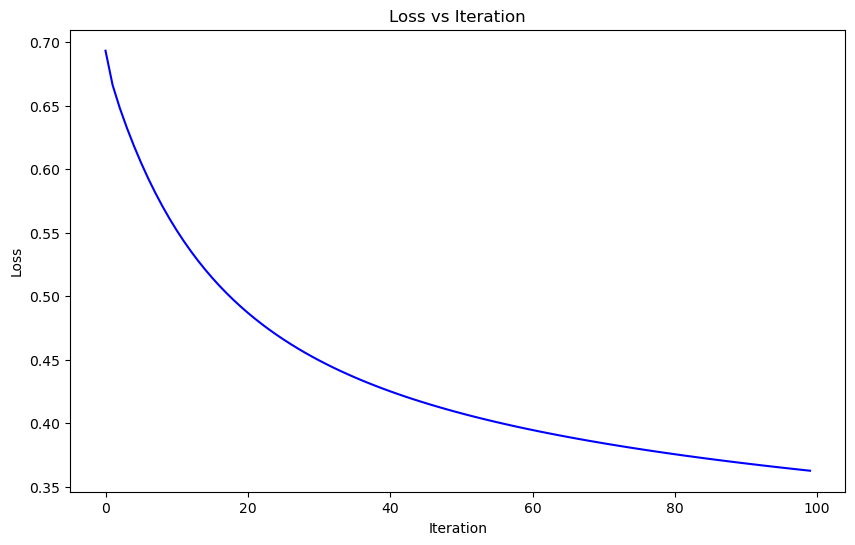

In [874]:
plt.figure(figsize=(10,6))
sns.lineplot(x=range(len(list_loss)),y=list_loss,color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iteration')
plt.show()

### Kết quả và so sánh

In [869]:
y_pred_sw_pl= predict(X_sw_pl,theta_sw_pl)

In [870]:
accuracy_score(y,y_pred_sw_pl)

0.9